In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
import matplotlib.pyplot as plt
from utils import *
from compare import compare



In [2]:
val_labels = loadLabels("/reg/neh/home/liponan/data/cxic0415/cs231n/val/", 1000)
print("labels of {} images loaded".format(str(len(val_labels))))
print('first data:')
print(val_labels[0])

labels of 1000 images loaded
first data:
[(153.0, 125.0), (79.0, 151.0), (100.0, 153.0), (273.0, 177.0), (262.0, 202.0), (204.0, 206.0), (313.0, 228.0), (273.0, 230.0), (66.0, 255.0), (178.0, 285.0), (143.0, 298.0), (39.0, 304.0), (305.0, 312.0), (32.0, 334.0), (61.0, 347.0), (80.0, 349.0), (605.0, 44.0), (441.0, 94.0), (448.0, 109.0), (445.0, 117.0), (429.0, 165.0), (426.0, 173.0), (538.0, 177.0), (519.0, 209.0), (674.0, 212.0), (426.0, 223.0), (668.0, 227.0), (599.0, 266.0), (596.0, 275.0), (453.0, 293.0), (801.0, 98.0), (791.0, 137.0), (1058.0, 153.0), (1047.0, 201.0), (1049.0, 228.0), (817.0, 234.0), (1157.0, 269.0), (907.0, 282.0), (810.0, 285.0), (1125.0, 318.0), (898.0, 329.0), (1051.0, 333.0), (802.0, 341.0), (1086.0, 365.0), (1214.0, 103.0), (1328.0, 144.0), (1184.0, 147.0), (1195.0, 161.0), (1373.0, 194.0), (1214.0, 204.0), (1413.0, 240.0), (1487.0, 283.0), (1193.0, 292.0), (1180.0, 301.0), (1238.0, 366.0)]


In [21]:
resultPath = "/reg/neh/home/liponan/ai/darknet/results/"
archs = ["newpeaksv5", "yolov3-peaks", "cxic0415_val_newpeaksv5_gray_6240", "cxic0415_val_newpeaksv5_gray_12480"]
# archs = ["cxic0415_val_newpeaksv7_12480"]
# archs = ["cxic0415_val_newpeaksv7_12480", "cxic0415_val_newpeaksv8_12480","cxic0415_val_newpeaksv9_12480"]
archs = ["newpeaksv5"]

# threshs = [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.4, 0.5]
# threshs = [0.35, 0.45, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80]
threshs = [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
# pre_vs_sen = {}

for arch in archs:
    print("******************************************")
    print("*****       validating " + arch)
    print("******************************************")
    val_results = loadResults(resultPath+arch+".json")
    print("results of {} images loaded".format(str(len(val_results))))
    print('first data has {} objects'.format(str(len(val_results[0]))))
    
    for thresh in threshs:
        print("========== threshold " + str(thresh) + " ==========")
        val_comp_results, val_comp_stats = compare( val_labels, val_results, thresh, (11,11), False )
        val_sen, val_pre, val_iou, val_dist = val_comp_stats
        print('val sensitivity:', val_sen)
        print('val precision:', val_pre)
        print('val avg. IOU:', val_iou)
        print('val avg. dist.:', val_dist)
        pre_vs_sen[ (arch, thresh) ] = val_comp_stats
        if val_sen == -1:
            break

******************************************
*****       validating newpeaksv5
******************************************
/reg/neh/home/liponan/ai/darknet/results/newpeaksv5.json
results of 1000 images loaded
first data has 867 objects
========== threshold 0.01 ==========
('val sensitivity:', 0.9918637772846733)
('val precision:', 0.059927736046401066)
('val avg. IOU:', 0.22591736823905736)
('val avg. dist.:', 0.641498688673145)
========== threshold 0.05 ==========
('val sensitivity:', 0.9733408872731851)
('val precision:', 0.2979066720613452)
('val avg. IOU:', 0.24354385713105686)
('val avg. dist.:', 0.6837446515116133)
========== threshold 0.1 ==========
('val sensitivity:', 0.9444313299655351)
('val precision:', 0.457011438232024)
('val avg. IOU:', 0.26586909162326305)
('val avg. dist.:', 0.734954631733137)
========== threshold 0.15 ==========
('val sensitivity:', 0.8944022158223565)
('val precision:', 0.6001246013811746)
('val avg. IOU:', 0.28340839282736646)
('val avg. dist.:', 0.77

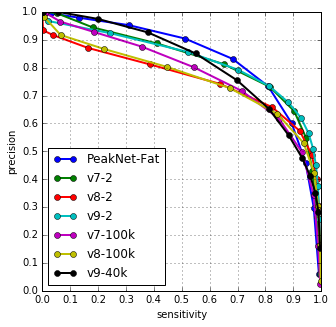

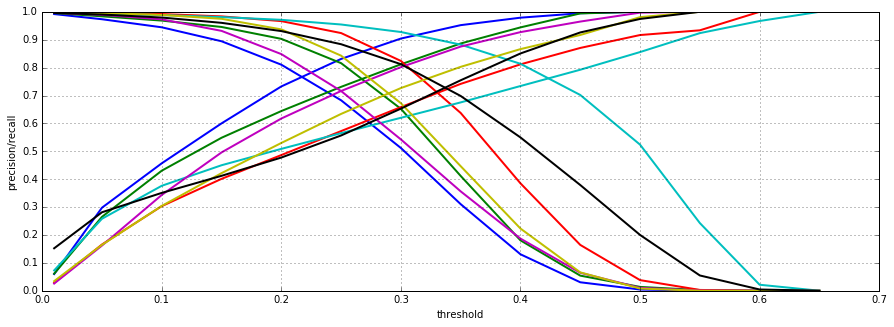

In [24]:
archs = ["newpeaksv5", "cxic0415_val_newpeaksv7_12480", "cxic0415_val_newpeaksv8_12480","cxic0415_val_newpeaksv9_12480",
         "cxic0415_val_newpeaksv7_100000", "cxic0415_val_newpeaksv8_100000", "cxic0415_val_newpeaksv9_40000"]
threshs = [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8]
official_names = {"newpeaksv2":"PeakNet", "newpeaksv3":"PeakNet-Shallow", "newpeaksv4":"PeakNet-Small", 
                  "newpeaksv5":"PeakNet-Fat", "yolov3-peaks":"Yolo3", "cxic0415_val_newpeaksv5_gray_6240":"v5-1",
                  "cxic0415_val_newpeaksv5_gray_12480":"v5-2", "cxic0415_val_newpeaksv5_gray_18720":"v5-3",
                  "cxic0415_val_newpeaksv5_gray_24960":"v5-4", "cxic0415_val_newpeaksv5_gray_31200":"v5-5",
                  "cxic0415_val_newpeaksv6_6240":"v6-1", "cxic0415_val_newpeaksv6_12480":"v6-2",
                  "cxic0415_val_newpeaksv7_6240":"v7-1", "cxic0415_val_newpeaksv7_12480":"v7-2",
                  "cxic0415_val_newpeaksv8_12480":"v8-2", "cxic0415_val_newpeaksv8_100000":"v8-100k",
                  "cxic0415_val_newpeaksv9_12480":"v9-2", "cxic0415_val_newpeaksv7_100000":"v7-100k",
                  "cxic0415_val_newpeaksv9_40000":"v9-40k"}


colors = 'bgrcmyk'

fig, ax = plt.subplots(1)
for arch in archs:
    x = []
    y = []
    for thresh in threshs:
        sen, pre, _, _ = pre_vs_sen[ (arch, thresh) ]
        if sen != -1:
            x.append( min([sen, 1]) )
            y.append( min([pre, 1]) )
        else:
            break
    plt.plot( x, y, '-o', linewidth=2, label=official_names[arch] )
plt.legend(loc="lower left")
plt.xlabel('sensitivity')
plt.ylabel('precision')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.grid(True)
ax.set_aspect('equal')
fig.set_size_inches(5, 5)
plt.savefig('output/val_arch_comp.png', bbox_inches='tight', dpi=300)
plt.show()

fig, ax = plt.subplots(1)
for i, arch in enumerate(archs):
    x = []
    y = []
    for thresh in threshs:
        sen, pre, _, _ = pre_vs_sen[ (arch, thresh) ]
        if sen != -1:
            x.append( min([sen, 1]) )
            y.append( min([pre, 1]) )
        else:
            break
    plt.plot( threshs[:len(x)], x, '-'+colors[i], 
              threshs[:len(x)], y, '-'+colors[i],
              linewidth=2, label=official_names[arch] )
# plt.legend(loc="lower left")
plt.xlabel('threshold')
plt.ylabel('precision/recall')
ax.set_xlim([0, 0.7])
ax.set_ylim([0, 1])
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.grid(True)
# ax.set_aspect('equal')
fig.set_size_inches(15, 5)
plt.savefig('output/val_arch_comp2.png', bbox_inches='tight', dpi=300)
plt.show()

In [31]:
thresh = 0.25

for arch in archs:
    print(official_names[arch])
    val_sen, val_pre, val_iou, val_dist = pre_vs_sen[ (arch, thresh) ]
    print('val sensitivity:', val_sen)
    print('val precision:', val_pre)
    print('val avg. IOU:', val_iou)
    print('val avg. dist.:', val_dist)
    print("===================================")

v5-1
('val sensitivity:', 0.5837936515430496)
('val precision:', 0.7846355598798596)
('val avg. IOU:', 0.2828720720171461)
('val avg. dist.:', 0.8474151992044394)
v5-2
('val sensitivity:', 0.5836205404214468)
('val precision:', 0.8150012087115135)
('val avg. IOU:', 0.28331952123239884)
('val avg. dist.:', 0.8404959375384197)
v5-3
('val sensitivity:', 0.8315314039311962)
('val precision:', 0.7013645534671339)
('val avg. IOU:', 0.2856543649058516)
('val avg. dist.:', 0.8481438435347833)
v5-4
('val sensitivity:', 0.7440630753977622)
('val precision:', 0.7455414163394674)
('val avg. IOU:', 0.2761342003270123)
('val avg. dist.:', 0.7897676236689226)
v5-5
('val sensitivity:', 0.6795083644146483)
('val precision:', 0.7498263406501806)
('val avg. IOU:', 0.27875119643670004)
('val avg. dist.:', 0.8005228933812071)


In [6]:
test_labels = loadLabels("data/test_labels/", 1000)
print("labels of {} images loaded".format(str(len(test_labels))))
print('first data:')
print(test_labels[0])

labels of 1000 images loaded
first data:
[(213, 173), (207, 177), (20, 180), (361, 183), (151, 192), (114, 212), (19, 263), (162, 265), (286, 286), (255, 322), (92, 335), (20, 340), (91, 352), (145, 353), (453, 23), (611, 64), (519, 118), (483, 194), (400, 229), (743, 236), (453, 244), (678, 273), (442, 283), (427, 291), (487, 360), (464, 362), (828, 208), (837, 274), (1057, 298), (841, 305), (1142, 613), (1295, 84), (1330, 157), (1170, 223), (1326, 232), (1404, 233), (1333, 249), (1337, 275), (1186, 285), (1224, 338), (1483, 1389), (1477, 1442)]


******************************************
*****       testing newpeaksv5
******************************************
data/test_results/newpeaksv5.json
results of 1000 images loaded
first data has 256 objects
========== threshold 0.005 ==========
test sensitivity: 0.8175723525801426
test precision: 0.02466085694382188
test avg. IOU: 0.22606861516173002
test avg. dist.: 0.6276528743738916
========== threshold 0.01 ==========
test sensitivity: 0.8175723525801426
test precision: 0.06324432856843178
test avg. IOU: 0.2260426409829654
test avg. dist.: 0.6446818760164995
========== threshold 0.02 ==========
test sensitivity: 0.8175723525801426
test precision: 0.14457435416637943
test avg. IOU: 0.2311005731678867
test avg. dist.: 0.6468744267889875
========== threshold 0.05 ==========
test sensitivity: 0.8175723525801426
test precision: 0.3036075134920907
test avg. IOU: 0.24370711135707376
test avg. dist.: 0.6819312505070617
========== threshold 0.1 ==========
test sensitivity: 0.81757235258014

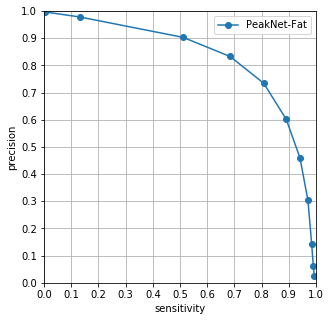

In [7]:
resultPath = "data/test_results/"
arch ="newpeaksv5"

threshs = [0.005, 0.01, 0.02, 0.05, 0.10, 0.15, 0.20, 0.25, 0.3, 0.4, 0.5]
pre_vs_sen = {}

print("******************************************")
print("*****       testing " + arch)
print("******************************************")
test_results = loadResults(resultPath+arch+".json")
print("results of {} images loaded".format(str(len(test_results))))
print('first data has {} objects'.format(str(len(test_results[0]))))

for thresh in threshs:
    print("========== threshold " + str(thresh) + " ==========")
    test_comp_results, test_comp_stats = compare( test_labels, test_results, thresh, (11,11), False )
    test_sen, test_pre, test_iou, test_dist = test_comp_stats
    print('test sensitivity:', val_sen)
    print('test precision:', test_pre)
    print('test avg. IOU:', test_iou)
    print('test avg. dist.:', test_dist)
    pre_vs_sen[ (arch, thresh) ] = test_comp_stats
    if test_sen == -1:
        break
   
x = []
y = []
fig, ax = plt.subplots(1)
for thresh in threshs:
    sen, pre, _, _ = pre_vs_sen[ (arch, thresh) ]
    if sen != -1:
        x.append( min([sen, 1]) )
        y.append( min([pre, 1]) )
    else:
        break
plt.plot( x, y, '-o', label=official_names[arch] )
plt.legend()
plt.xlabel('sensitivity')
plt.ylabel('precision')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
ax.grid(True)
ax.set_aspect('equal')
fig.set_size_inches(5, 5)
plt.savefig('output/' + arch + '_sen_vs_pre.png', bbox_inches='tight', dpi=300)
plt.show()